In [1]:
import sys
sys.executable # checking environment

'/home/yusuf/mileapp_env/bin/python'

### To Do List

This is the instruction from the task:
```
This test will assess your analytical thinking, how you work with data, and transform your findings into insight or something useful. We have provided a sample of delivery tasks for 10 days. From this data, we'd like to know what insight you can get. Some part of the insight should be related to machine learning and data visualization.

All of your work should be pushed to your own Git repository, including the result of your
insight in any formats such as Markdown, HTML, PDF, etc.

The data can be accessed from: https://github.com/indrasetiadhip/data-task-sample.

Please send back the link of your Git repository to datascientist.test@mile.app,
with the following subject: [Your name] – Data Scientist Test.
```
This is how I am going to approach the problem:
1. Read README.md
2. Create some exploratory data analysis (EDA)
3. Formulate business problem and list some hypotheses to answer the problem
4. Create machine learning model to validate the hypotheses

### 1. Read README.md

These are the additional information from the `README.md` file

#### Fields

`taskId`: Unique identifier for the task that generated by system.

`taskCreatedTime`: Time at when the task was created.

`taskCompletedTime`: Time at when the task was completed.

`taskAssignedTo`: Worker that doing the task.

`taskLocationDone`: Coordinate of where the task was completed.

`flow`: Flow or type of the task.

`cod`: Contains data for the COD system.

`cod.amount`: Amount of money from COD.

`cod.received`: COD has been received or not.

`UserVar`: Contains more specified data, in this case the 'UserVar' is about delivery task data.

`UserVar.taskStatus`: Delivery status code.

`UserVar.taskStatusLabel`: Delivery status label.

`UserVar.taskDetailStatus`: Detailed delivery status code.

`UserVar.taskDetailStatusLabel`: Detailed delivery status label.

`UserVar.branch_origin`: Branch code of the origin.

`UserVar.branch_dest`: Branch code of the destination.

`UserVar.weight	Weight`: of the package.

### 2. Exploratory Data Analysis

In [2]:
# import basic libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install feature-engine

You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
# let's check the data
df = pd.read_json('./data-task-sample-main/data-sample.json')
df.head()

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497772999999995}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."


We can see that there are JSONs in the column. We are going to expand it first

In [5]:
import json
cols = ['taskLocationDone', 'cod']
df = pd.json_normalize(df.to_dict(orient='records'))
df = df.drop(cols, axis=1)
df.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


Now the DataFrame is expanded and we can check some information about the data

In [6]:
print('Number of rows:', len(df))

Number of rows: 8334


Let's check for the null values and see whether we can make sense out of the data

In [7]:
df.isna().sum()

taskCreatedTime                     0
taskAssignedTo                      1
taskCompletedTime                 768
taskStatus                          0
flow                                0
taskId                              0
taskLocationDone.lon              768
taskLocationDone.lat              768
cod.amount                       5976
cod.received                     5976
UserVar.branch_dest                 0
UserVar.taskStatusLabel           762
UserVar.receiver_city              52
UserVar.taskDetailStatusLabel     762
UserVar.taskDetailStatus          762
UserVar.weight                      0
UserVar.branch_origin             293
UserVar.taskStatus                762
dtype: int64

Let's define our hypotheses when seeing the null values:
1. `taskAssignedTo`: It is possible that the task hasn't been assigned to anyone, and that also explains why there is only one value missing. If it is true, other fields should also have null value, especially `taskCompletedTime`.
2. `taskCompletedTime`: It is possible that incomplete tasks can have null completion time. We can validate this hypothesis by looking at `taskStatus` column.
3. `taskLocationDone.lon` and `taskLocationDone.lat`: These columns have the same number of null values with `taskCompletedTime`, which strengthens the previous hypothesis.
4. `cod.amount`: COD stands for **Cash on Delivery**, that is one type of delivery method which enable customers to pay once the package arrives. This column should contain the amount paid by the customers
5. `cod.received`: Same as before. Should contain boolean information whether the COD items are received by customers or not
6. `UserVar.taskStatusLabel`: We'll need to check the unique values contained in the column before we can make any assumption about the column
7. `UserVar.receiver_city`: This is quite confusing. Receiver city should be a crucial information in delivery data. We'll need to take a closer look to the missing values
8. `UserVar.taskDetailStatusLabel`: When I look into the sample data above, I guess it's about how the delivery is directed to. `YANG BERSANGKUTAN` can mean the package is delivered to the user who created the order. Nevertheless, we'll need to look at the data more closely
9. `UserVar.taskDetailStatus`: Should contain the codified version of the previous column
10. `UserVar.branch_origin`: Should contain the original branch for the delivery
11. `UserVar.taskStatus`: Should contain the status of the task

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
taskLocationDone.lon,7566.0,75.355852,52.492016,0.000000,0.000000,106.843097,112.182877,1.408064e+02
taskLocationDone.lat,7566.0,-3.610514,3.647171,-10.493658,-7.061575,-3.329263,0.000000,5.564040e+00
cod.amount,2358.0,191141.083545,272377.003934,837.000000,61000.000000,153375.000000,235000.000000,4.730000e+06


According to [this source](https://latitudelongitude.org/id/), Indonesia's coordinate are: Latitude from -10.1718 to 5.88969 and longitude from 95.31644 to 140.71813. Which should make sense for the latitude data. However, there is something fishy with the `taskLocationDone.lon` since the first quartile of the longitude are filled with zeroes.

We'll need to take a closer look to the data to find out what to do with that column later on.

In [9]:
df[df['taskLocationDone.lon'] == 0.000000]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
1417,2022-11-02 07:42:18 +0700,thriftyWigeon5,2022-11-02 07:44:24 +0700,done,Delivery,68f683f1ca7d14664398,0.0,0.0,31906.0,False,PGK,Failed,"GABEK,PANGKAL PINANG",MISROUTE,U12,0.02,CGK,COLF02
1547,2022-11-02 07:50:24 +0700,drearyPepper9,2022-11-02 07:51:37 +0700,done,Delivery,9e551fdece96cf3dbf1c,0.0,0.0,NaN,NaN,PLM,Failed,"PLAJU,PALEMBANG",MISROUTE,U12,2,CGK,COLF02
1548,2022-11-02 07:50:24 +0700,drearyPepper9,2022-11-02 07:51:37 +0700,done,Delivery,e9b5c110774d0c4ebaa0,0.0,0.0,NaN,NaN,PLM,Failed,"SEBERANG ULU I, PALE",MISROUTE,U12,1,CGK,COLF02
1551,2022-11-02 07:50:24 +0700,drearyPepper9,2022-11-02 07:51:37 +0700,done,Delivery,d8fae27f339cc481883a,0.0,0.0,NaN,NaN,PLM,Failed,"SEBERANG ULU I, PALE",MISROUTE,U12,1,CGK,COLF02
1554,2022-11-02 07:50:24 +0700,drearyPepper9,2022-11-02 07:51:37 +0700,done,Delivery,5f65da66c47f35ce7186,0.0,0.0,NaN,NaN,PLM,Failed,PALEMBANG,MISROUTE,U12,1,CGK,COLF02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8325,2022-11-10 08:23:41 +0700,ferventBoa6,2022-11-10 09:38:02 +0700,done,Delivery,a51606c83f1f0d64fbdb,0.0,0.0,NaN,NaN,DJB,Success,"DENDANG,MUARASABAK",YANG BERSANGKUTAN,D01,2,CGK,COLF01
8326,2022-11-10 08:37:54 +0700,gutturalLapwing2,2022-11-10 09:38:03 +0700,done,Delivery,ae9cb5cfa113db947621,0.0,0.0,NaN,NaN,DPK,Success,"SUKMAJAYA,DEPOK",YANG BERSANGKUTAN,D01,4.08,CGK,COLF01
8328,2022-11-10 07:46:14 +0700,emptyPretzels3,2022-11-10 09:37:50 +0700,done,Delivery,469a6678ea253784e7e3,0.0,0.0,NaN,NaN,CGK,Success,JAKARTA PUSAT,RECEPTIONIST,D02,1,CGK,COLF01
8329,2022-11-10 09:07:12 +0700,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,0.0,0.0,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01


From the data, we can infer that it's not just the longitude data is missing. The latitude data is also missing. We are going to mark those observations.

In [10]:
df['is_latlon_missing'] = df['taskLocationDone.lon'].apply(lambda x: 1 if x == 0.0 else 0)
df[df['taskLocationDone.lon'] == 0.0].head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,is_latlon_missing
1417,2022-11-02 07:42:18 +0700,thriftyWigeon5,2022-11-02 07:44:24 +0700,done,Delivery,68f683f1ca7d14664398,0.0,0.0,31906.0,False,PGK,Failed,"GABEK,PANGKAL PINANG",MISROUTE,U12,0.02,CGK,COLF02,1
1547,2022-11-02 07:50:24 +0700,drearyPepper9,2022-11-02 07:51:37 +0700,done,Delivery,9e551fdece96cf3dbf1c,0.0,0.0,NaN,NaN,PLM,Failed,"PLAJU,PALEMBANG",MISROUTE,U12,2,CGK,COLF02,1
1548,2022-11-02 07:50:24 +0700,drearyPepper9,2022-11-02 07:51:37 +0700,done,Delivery,e9b5c110774d0c4ebaa0,0.0,0.0,NaN,NaN,PLM,Failed,"SEBERANG ULU I, PALE",MISROUTE,U12,1,CGK,COLF02,1
1551,2022-11-02 07:50:24 +0700,drearyPepper9,2022-11-02 07:51:37 +0700,done,Delivery,d8fae27f339cc481883a,0.0,0.0,NaN,NaN,PLM,Failed,"SEBERANG ULU I, PALE",MISROUTE,U12,1,CGK,COLF02,1
1554,2022-11-02 07:50:24 +0700,drearyPepper9,2022-11-02 07:51:37 +0700,done,Delivery,5f65da66c47f35ce7186,0.0,0.0,NaN,NaN,PLM,Failed,PALEMBANG,MISROUTE,U12,1,CGK,COLF02,1


Also, I realized that the weights are not included in the describe method. Let's see why

In [11]:
df['UserVar.weight'].dtypes

dtype('O')

In [12]:
df['UserVar.weight'] = pd.to_numeric(df['UserVar.weight'])

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
taskLocationDone.lon,7566.0,75.355852,52.492016,0.000000,0.000000,106.843097,112.182877,1.408064e+02
taskLocationDone.lat,7566.0,-3.610514,3.647171,-10.493658,-7.061575,-3.329263,0.000000,5.564040e+00
cod.amount,2358.0,191141.083545,272377.003934,837.000000,61000.000000,153375.000000,235000.000000,4.730000e+06
UserVar.weight,8334.0,2.448298,6.188171,0.000000,1.000000,1.000000,1.600000,2.025000e+02
is_latlon_missing,8334.0,0.294096,0.455663,0.000000,0.000000,0.000000,1.000000,1.000000e+00


There is something weird with items 0.000000 weight. We'll need to take a closer look

In [14]:
df[df['UserVar.weight'] == 0.000000]

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,is_latlon_missing
70,2022-11-01 11:03:45 +0700,peacefulVenison0,2022-11-01 17:45:55 +0700,done,Delivery,58937cf4397aca5e0020,106.341412,-6.662407,29842.0,True,CLG,Success,"SOBANG ,RANGKASBITUN",YANG BERSANGKUTAN,D01,0.0,CGK,COLF01,0
2135,2022-11-03 07:21:33 +0700,sugaryBoa6,2022-11-03 08:55:05 +0800,done,Delivery,bf6565f93725ce15c676,120.466370,-8.610245,NaN,NaN,KOE,Success,"KEC.RUTENG,MANGGARAI",SUPIR,D11,0.0,CGK,COLF01,0
2652,2022-11-04 11:28:38 +0700,alertWeaver9,2022-11-04 13:58:16 +0700,done,Delivery,cc5b0a14fc5d3022a7ab,106.755656,-6.193987,NaN,NaN,CGK,Success,"KEMBANGAN ,JAKARTA B",YANG BERSANGKUTAN,D01,0.0,CGK,COLF01,0
3712,2022-11-05 07:35:42 +0700,shyRuffs7,2022-11-05 07:40:48 +0700,done,Delivery,f664518c787e7c1fe467,112.662842,-7.965735,NaN,NaN,MXG,Failed,"PAKIS,KABUPATEN MALA",RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),U05,0.0,CGK,COLF02,0
4389,2022-11-06 07:02:52 +0700,peskyIcecream0,2022-11-06 07:40:10 +0700,done,Delivery,2fb1b915aea3f9d05f07,107.010696,-6.235479,NaN,NaN,BKI,Success,"BEKASI TIMUR, BEKASI",YANG BERSANGKUTAN,D01,0.0,CGK,COLF01,0
6566,2022-11-09 09:15:06 +0700,wrathfulPonie6,2022-11-09 09:15:50 +0700,done,Delivery,eaa82505ca732aa51b00,104.073117,-5.028200,NaN,NaN,TKG,Success,"BALIK BUKIT, LIWA",YANG BERSANGKUTAN,D01,0.0,TKG,COLF01,0


We can see from preliminary health check that there is no particular pattern to rows with 0 weight, because we can success and failed tasks in `UserVar.taskStatusLabel`. Maybe we can find some pattern later when we visualize the data. For now, let's just mark those rows.

In [15]:
df['is_weight_zero'] = df['UserVar.weight'].apply(lambda x: 1 if x == 0.0 else 0)
df[df['UserVar.weight'] == 0.0].head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,is_latlon_missing,is_weight_zero
70,2022-11-01 11:03:45 +0700,peacefulVenison0,2022-11-01 17:45:55 +0700,done,Delivery,58937cf4397aca5e0020,106.341412,-6.662407,29842.0,True,CLG,Success,"SOBANG ,RANGKASBITUN",YANG BERSANGKUTAN,D01,0.0,CGK,COLF01,0,1
2135,2022-11-03 07:21:33 +0700,sugaryBoa6,2022-11-03 08:55:05 +0800,done,Delivery,bf6565f93725ce15c676,120.466370,-8.610245,NaN,NaN,KOE,Success,"KEC.RUTENG,MANGGARAI",SUPIR,D11,0.0,CGK,COLF01,0,1
2652,2022-11-04 11:28:38 +0700,alertWeaver9,2022-11-04 13:58:16 +0700,done,Delivery,cc5b0a14fc5d3022a7ab,106.755656,-6.193987,NaN,NaN,CGK,Success,"KEMBANGAN ,JAKARTA B",YANG BERSANGKUTAN,D01,0.0,CGK,COLF01,0,1
3712,2022-11-05 07:35:42 +0700,shyRuffs7,2022-11-05 07:40:48 +0700,done,Delivery,f664518c787e7c1fe467,112.662842,-7.965735,NaN,NaN,MXG,Failed,"PAKIS,KABUPATEN MALA",RUMAH service/ KANTOR KOSONG (MASIH DIHUNI),U05,0.0,CGK,COLF02,0,1
4389,2022-11-06 07:02:52 +0700,peskyIcecream0,2022-11-06 07:40:10 +0700,done,Delivery,2fb1b915aea3f9d05f07,107.010696,-6.235479,NaN,NaN,BKI,Success,"BEKASI TIMUR, BEKASI",YANG BERSANGKUTAN,D01,0.0,CGK,COLF01,0,1


Now, we are going to further check our data as follows:
1. We can check if there are any duplicate IDs in the data.
2. According to the `README.md`, the sample data should contain 10 days delivery data. We are going to check if it is really the case.
3. If the delivery data contains full data of the day, we can check for the (most/least) busy day.
4. There are undone tasks in the dataset. If the data is cut at certain cutoff, the undone task should be concentrated on the last days in the dataset. We need to be cautious when analyzing those data. 
5. We can know the rush hour of a branch from `taskCreatedTime`. We can improve the experience of the customers and our employees by putting more workers during those critical hours.
6. Since we have the information of the worker, we can check for the worst/best worker. However, the main problem is we don't know what assigned means. Is the assigned worker related to the delivery location? Is there a worker working for two or more branch?
7. Some of the completed task have different timezones. We can check whether the timezone correspond to location of the `taskLocationDone`.
8. There are quite a few `UserVar.taskDetailStatusLabel`. We can check for the failed status and see whether there are any pattern to other columns.
9. For the `flow` column, we are going to check the unique values and filter irrelevant data.
10. We can check whether the `taskLocationDone` is the nearest to the branch destination.
11. Since we have `UserVar.receiver_city`, we can check whether it correspond to `taskLocationDone`
12. We have already seen some latitude and longitude that were filled by 0, we can check if that fact correspond to any other columns.
13. We can check whether COD is more preferred than non-COD method. The hypothesis is COD should be more popular than normal delivery method in rural areas compared to urban areas. It is unfortunate that we cannot compare the delivery cost for normal method since it is not in our dataset
14. We can see that the `UserVar.receiver_city` column is cut. Maybe we can extract some information from geocoding the data. That being said, we need to also check columns with null `UserVar.receiver_city` and whether it affects other data
15. We are going to check if there are those deliveries with same `UserVar.branch_origin` and `UserVar.branch_dest`
16. We can map the failed status with the `taskCompletedTime` and location to check whether there is any relationship
17. We can further improve the terms in our SLA (Service-Level Agreement) with this historical data. Certainly, better SLA will attract more business partners.

---
**Lower Priority**:

18. Weight and destinations? Or weight and SLAs?

### 1. Check if there are any duplicate IDs in the data

In [16]:
df['taskId'].value_counts().sort_values(ascending=False)

taskId
4fe3b237c832ca4841a2    1
2ff0dc469826158b7684    1
a9d53fa96c80baee8b23    1
67ec7d34b4f3adbf2895    1
2079aa99bda230940785    1
                       ..
5cc952d9e9f8066dbf24    1
1b136b5a3c60749eb571    1
e92e813c8539080c922e    1
2bf6ce01d5b6a8ac8f34    1
cdb90c597655282306fd    1
Name: count, Length: 8334, dtype: int64

Fortunately, there are no duplicates.

### 2. Check if the data really contains exactly 10 full days

In [17]:
!pip install datetime

You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.


In [18]:
import datetime

In [19]:
def extract_datetime_info(df, datetime_col):
    df = df.copy()
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
    df[datetime_col+'_date'] = df[pd.notnull(df[datetime_col])][datetime_col].dt.date
    df[datetime_col+'_day'] = df[pd.notnull(df[datetime_col])][datetime_col].dt.day
    df[datetime_col+'_dayofweek'] = df[pd.notnull(df[datetime_col])][datetime_col].dt.dayofweek
    df[datetime_col+'_hour'] = df[pd.notnull(df[datetime_col])][datetime_col].dt.hour
    return df

In [20]:
df = extract_datetime_info(df, 'taskCreatedTime')

In [21]:
df.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,is_latlon_missing,is_weight_zero,taskCreatedTime_date,taskCreatedTime_day,taskCreatedTime_dayofweek,taskCreatedTime_hour
0,2022-11-01 20:17:26+07:00,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13.000,CGK,COLF01,0,0,2022-11-01,1,1,20
1,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.300,CGK,COLF01,0,0,2022-11-01,1,1,8
2,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,0,0,2022-11-01,1,1,8
3,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,0,0,2022-11-01,1,1,8
4,2022-11-01 08:41:07+07:00,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3.000,CGK,COLF01,0,0,2022-11-01,1,1,8


In [22]:
df['taskCreatedTime_date'].unique()

array([datetime.date(2022, 11, 1), datetime.date(2022, 11, 2),
       datetime.date(2022, 11, 3), datetime.date(2022, 11, 4),
       datetime.date(2022, 11, 5), datetime.date(2022, 11, 6),
       datetime.date(2022, 11, 7), datetime.date(2022, 11, 8),
       datetime.date(2022, 11, 9), datetime.date(2022, 11, 10)],
      dtype=object)

As expected, there are 10 days of delivery data. Now, we are going to check whether the data for first or last day is complete

### 3. Checking for (Most/Least) Busiest Day

<Axes: ylabel='taskCreatedTime_date'>

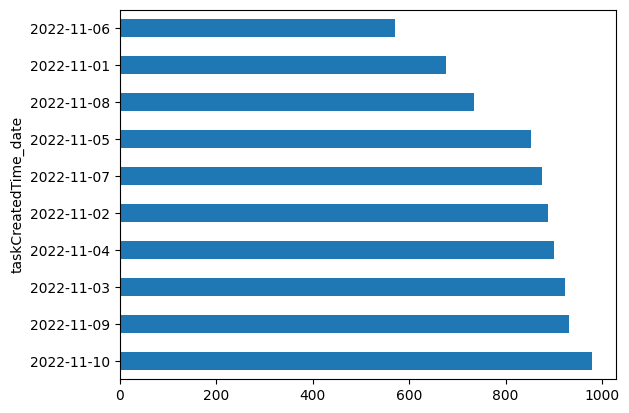

In [23]:
df['taskCreatedTime_date'].value_counts().plot.barh()

There is something fishy with the data on the 6th and 1st date. Let's take a closer look

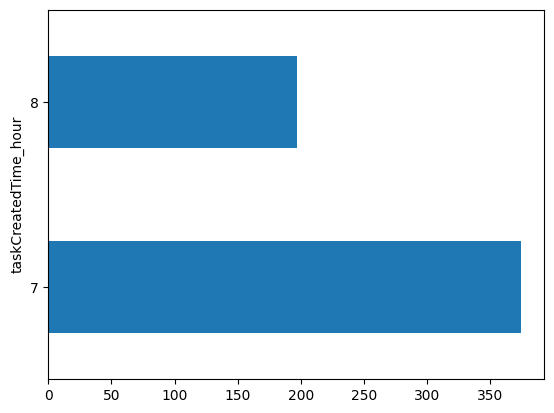

In [24]:
df[df['taskCreatedTime_date'] == datetime.date(2022, 11, 6)]['taskCreatedTime_hour'].value_counts().plot.barh()
plt.show()

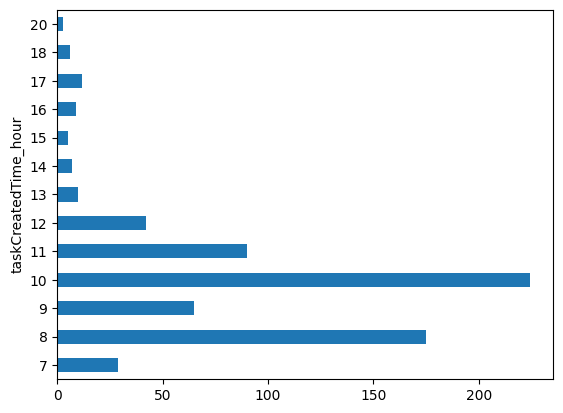

In [25]:
df[df['taskCreatedTime_date'] == datetime.date(2022, 11, 1)]['taskCreatedTime_hour'].value_counts().sort_index().plot.barh()
plt.show()

We found out that on `2022-11-06`, orders were only made between 7 am to 9 am, and probably causing the number of orders dropped significantly. Is it possible that our system was having an error during the day? There is some probability. Unfortunately, we cannot validate the hypothesis since we don't have data from another week and it can happen due to weekly seasonal trend of our orders.

Having said so, let's check for other days.

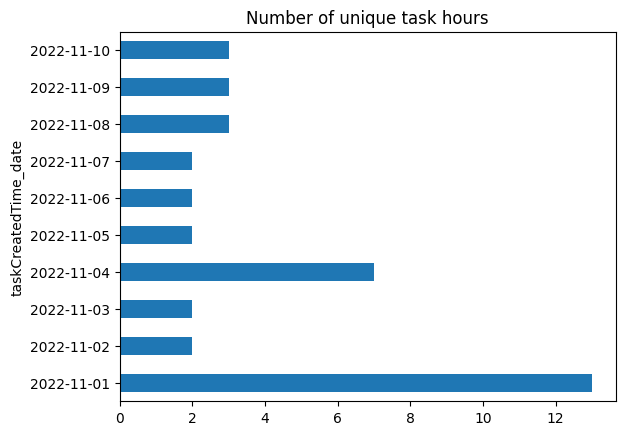

In [26]:
df.groupby('taskCreatedTime_date')['taskCreatedTime_hour'].nunique().plot.barh()
plt.title('Number of unique task hours')
plt.show()

Curiously, the number of unique hours of tasks doesn't really correlate well with the number of tasks. We can see that on `2022-11-01` the unique hours are high but the number of tasks are low. We can illustrate it further by a scatter plot.

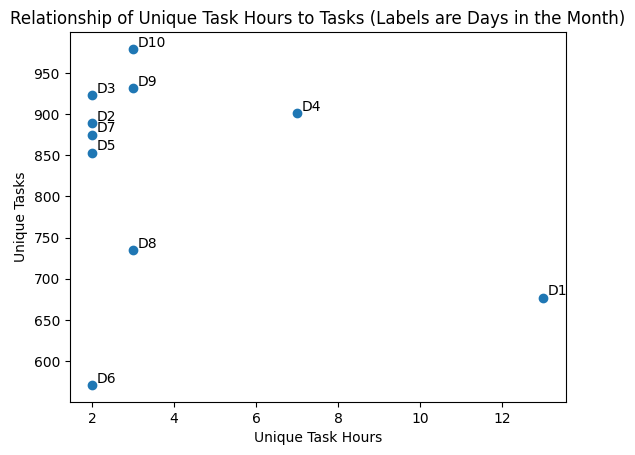

In [27]:
def plot_unique_hours_scatter(df):
    x = df.groupby('taskCreatedTime_day')['taskCreatedTime_hour'].nunique()
    y = df['taskCreatedTime_day'].value_counts()
    df_temp = pd.merge(x, y, left_index=True, right_index=True)
    plt.scatter(df_temp['taskCreatedTime_hour'], df_temp['count'])
    for idx, row in df_temp.iterrows():
        plt.text(row['taskCreatedTime_hour']+0.1, row['count']+3, 'D'+str(idx))
    plt.title('Relationship of Unique Task Hours to Tasks (Labels are Days in the Month)')
    plt.xlabel('Unique Task Hours')
    plt.ylabel('Unique Tasks')
    plt.show()

plot_unique_hours_scatter(df)

### 4. Checking Undone Tasks

Let's assume that undone tasks are tasks with null `taskCompletedTime`. We are going to explore the data first and will later check if there are any other possibilities.

In [28]:
df['is_undone'] = df['taskCompletedTime'].apply(lambda x: 1 if x != x else 0)
df[ df['taskCompletedTime'].isna() ].head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus,is_latlon_missing,is_weight_zero,taskCreatedTime_date,taskCreatedTime_day,taskCreatedTime_dayofweek,taskCreatedTime_hour,is_undone
550,2022-11-01 15:04:06+07:00,mildCardinal0,NaN,done,Delivery,9779ae5b5f88ba0bf31c,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,3.0,CGK,COLF01,0,0,2022-11-01,1,1,15,1
551,2022-11-01 16:59:58+07:00,mildCardinal0,NaN,done,Delivery,8ade827b1e3530c02e82,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,4.9,CGK,COLF01,0,0,2022-11-01,1,1,16,1
552,2022-11-01 16:59:58+07:00,mildCardinal0,NaN,done,Delivery,292b1e9f73099dac1209,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,8.0,CGK,COLF01,0,0,2022-11-01,1,1,16,1
553,2022-11-01 16:59:58+07:00,mildCardinal0,NaN,done,Delivery,7e8862b3f4010465f006,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,17.0,BDO,COLF01,0,0,2022-11-01,1,1,16,1
554,2022-11-01 10:13:02+07:00,mildCardinal0,NaN,done,Delivery,a4fb8aed363abc3d6af3,NaN,NaN,NaN,NaN,BKI,Success,"BABELAN,CIKARANG",YANG BERSANGKUTAN,D01,1.0,CGK,COLF01,0,0,2022-11-01,1,1,10,1


In [29]:
def plot_pct_undone_bar(df):
    df = df.copy()
    df_plot = df.groupby('taskCreatedTime_date')['is_undone'].agg(['sum', 'count'])
    df_plot['pct_undone'] = df_plot['sum']/df_plot['count']
    df_plot['pct_undone'].sort_index().plot.barh()
    plt.title('Percent of Undone Tasks by Date')
    plt.show()

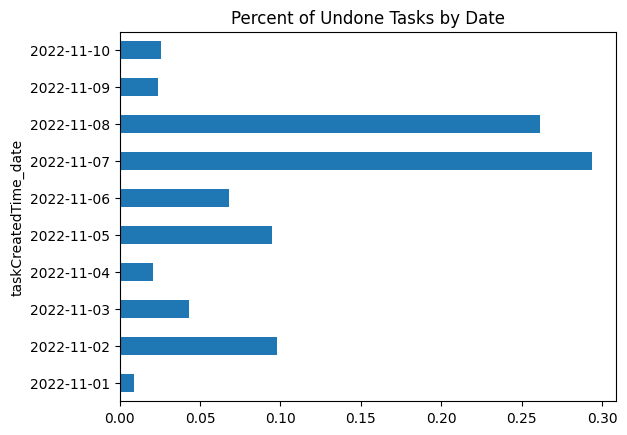

In [30]:
plot_pct_undone_bar(df)

Once again, I am flabbergasted by the result of the plot. The percentage of undone tasks are not concentrated in the last days of the data.

### 5. Checking Rush Hours

Knowing the rush hour of a branch can help us to prepare the resources. Let's take a look at how many tasks are created in every hour. But first, we need to check the origin branches.

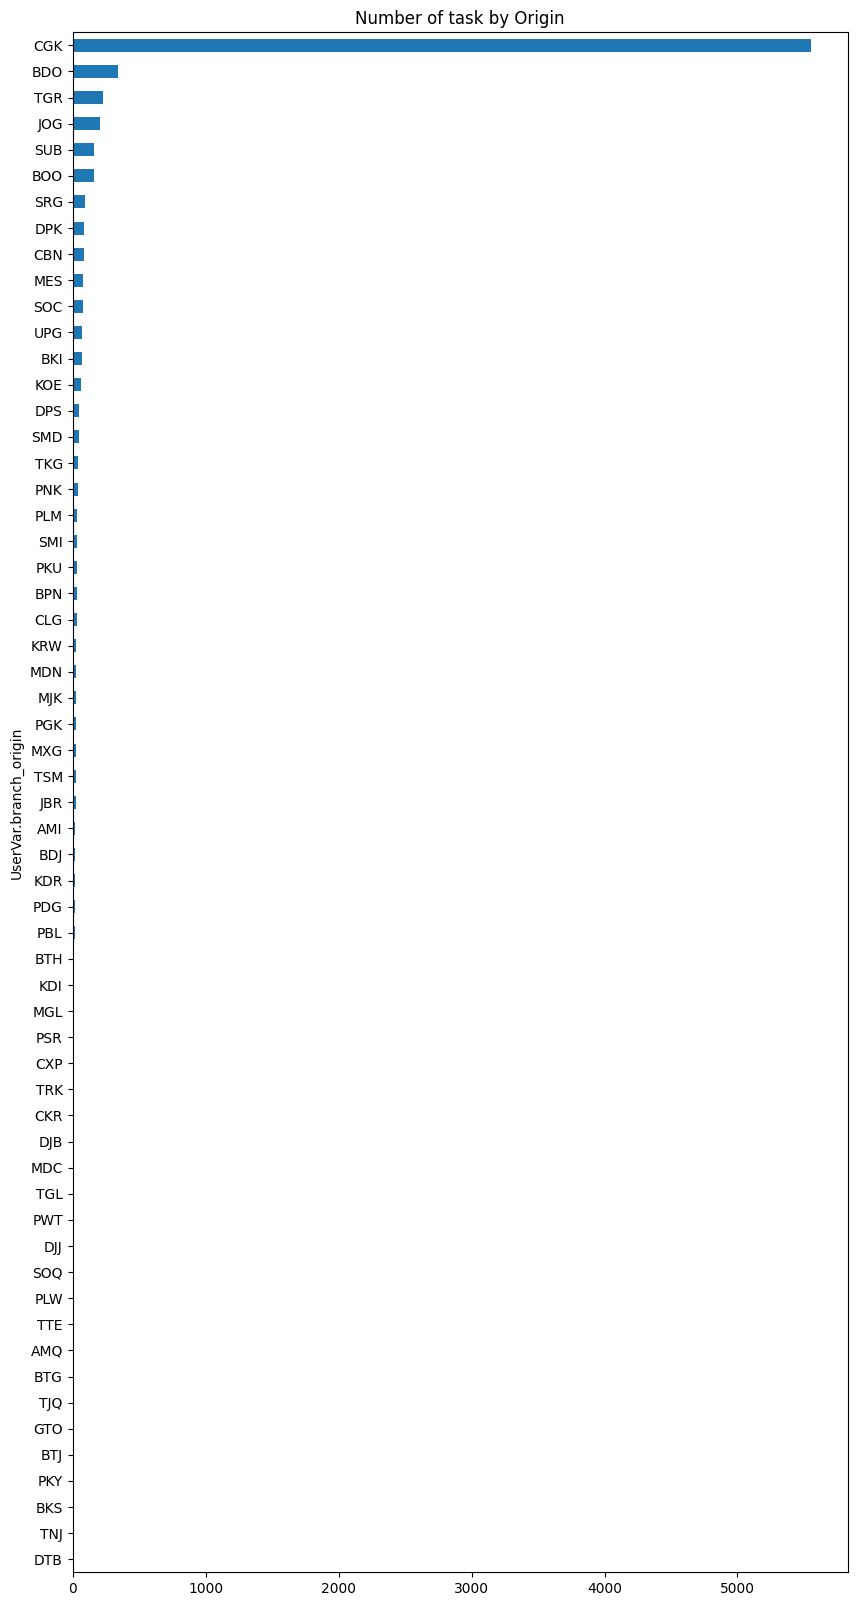

In [31]:
df['UserVar.branch_origin'].value_counts().sort_values().plot.barh(figsize=(10, 20))
plt.title('Number of task by Origin')
plt.show()

Let's take a look at the normalized version to get the sense of proportion

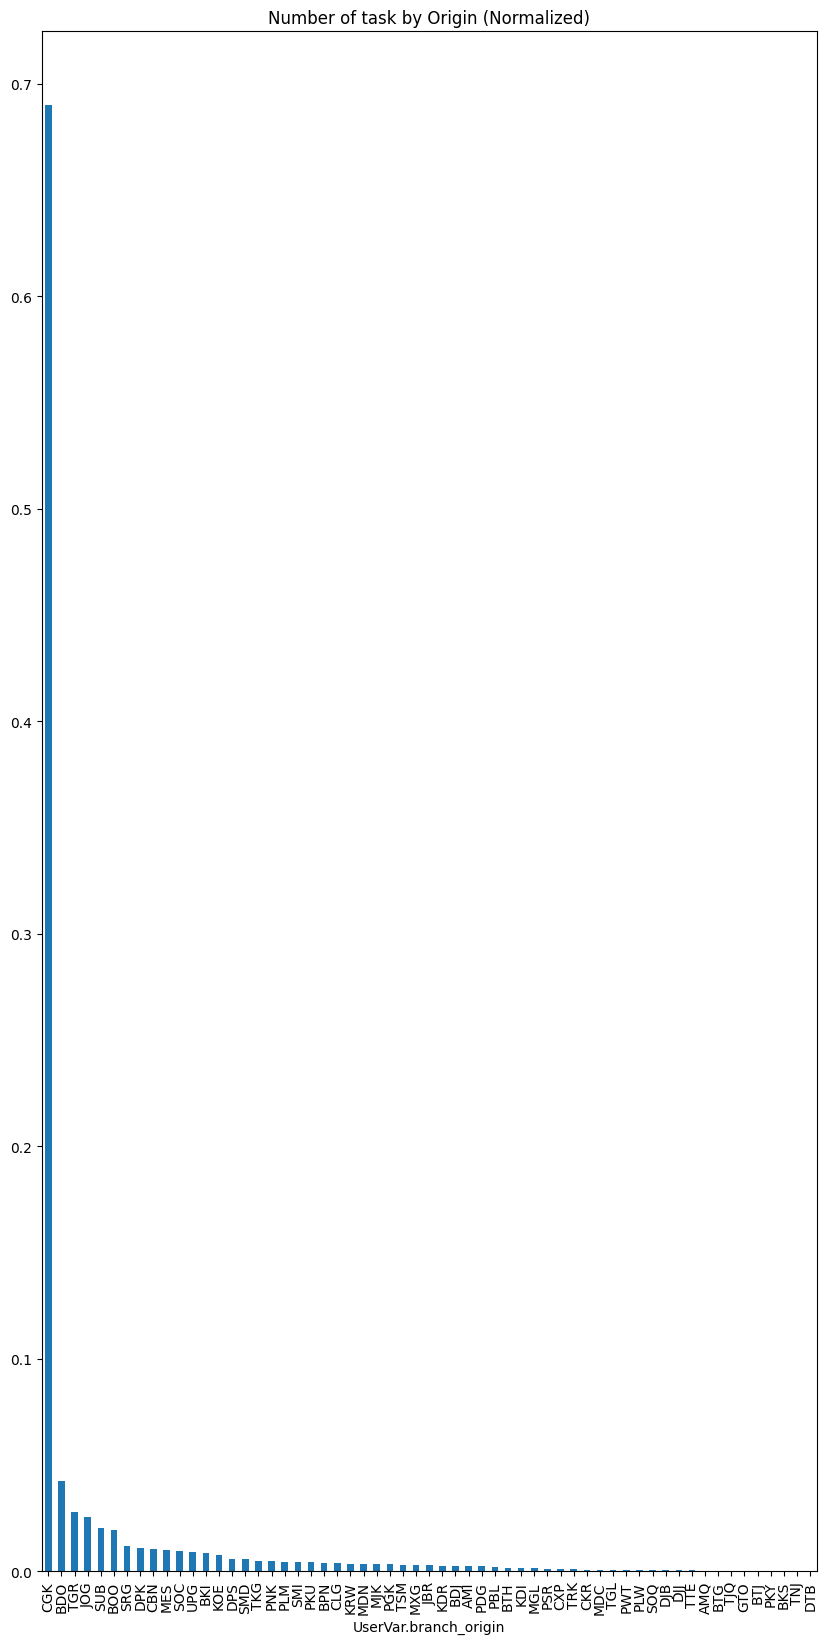

In [32]:
df['UserVar.branch_origin'].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(10, 20))
plt.title('Number of task by Origin (Normalized)')
plt.show()

We can see that the number of branch origin are concentrated in CGK since the second in place (BDO) are less than 5% of our tasks. We will take a deeper look into it

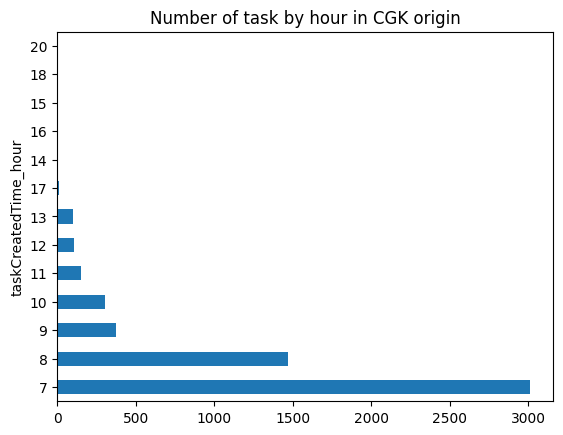

In [33]:
df[ df['UserVar.branch_origin'] == 'CGK' ]['taskCreatedTime_hour'].value_counts().plot.barh()
plt.title('Number of task by hour in CGK origin')
plt.show()

From efficiency perspective, it is better reduce workers or even close our branch after 2 pm since our rush hours are between 7 am to 9 am. On the other hand, we can try to open our branch earlier than 7 am (probably to 6 am) to reduce the concentrated workload at 7 am. It is possible that our customers' satisfaction will decline if our workers are too busy with the stream of tasks.

### 6. Assignee and its relation with Branches and Productivity

In [34]:
df['taskAssignedTo'].value_counts()

taskAssignedTo
gutturalLion9     103
gloomyLlama0       83
zestyPear3         64
emptyIcecream6     57
artisticHyena7     56
                 ... 
emptyAntelope3      1
finickyCoati6       1
thriftyLion5        1
somberHeron8        1
murkyThrushe3       1
Name: count, Length: 2787, dtype: int64

We cannot make any definitive judgement about the data because we don't really know what being assigned really mean. However, it is quite weird that some employee are assigned with so many tasks while some receive none.

We can also measure the productivity by checking the error rate (# failed tasks / # of tasks) of a worker

In [35]:
df['UserVar.taskStatusLabel'].value_counts()

UserVar.taskStatusLabel
Success    5427
Failed     2145
Name: count, dtype: int64

In [36]:
def count_error_rate(df):
    df = df.copy()
    df['is_failed'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Failed' else 0)
    df = df.groupby('taskAssignedTo').agg({'is_failed': 'sum', 'taskId': 'count'})
    df['error_rate'] = df['is_failed']/df['taskId']
    print(df[ df['error_rate'] > 0 ].sort_values(['error_rate', 'taskId'], ascending=[False, False]))
    return True
count_error_rate(df)

                 is_failed  taskId  error_rate
taskAssignedTo                                
gutturalLion9          103     103    1.000000
gloomyLlama0            83      83    1.000000
artisticHyena7          56      56    1.000000
scornfulOcelot0         42      42    1.000000
drearyPepper9           35      35    1.000000
...                    ...     ...         ...
emptyCow4                1      20    0.050000
mereLocust3              1      20    0.050000
relievedCur9             1      20    0.050000
importedStork6           1      25    0.040000
zestyPear3               1      64    0.015625

[710 rows x 3 columns]


True

There is something fishy going on here. There are workers with 100% error rate. We need to train and evaluate all the worker more strictly or even lay off these workers if there is an indication of cheating.

Let's check by how many branch destinations are served by a worker.

In [37]:
df.groupby('taskAssignedTo')['UserVar.branch_dest'].nunique().sort_values(ascending=False)

taskAssignedTo
jumpyGelding4        2
similarTomatoe6      2
gloomyMussel3        2
humorousMandrill0    2
amazedSalami5        2
                    ..
enviousSeagull0      1
enviousSheep9        1
enviousUnicorn8      1
enviousViper9        1
zestyWidgeon1        1
Name: UserVar.branch_dest, Length: 2787, dtype: int64

When we take a look from branch destination perspective, it makes much more sense. Though it is still weird that there are workers who are working for more than one branch destination.

We can also measure the productivity of a destination branch by checking the number of task divided by the number of workers in the branch. We are going to plot the success rate on x-axis and (#Tasks/#Workers) on y-axis.

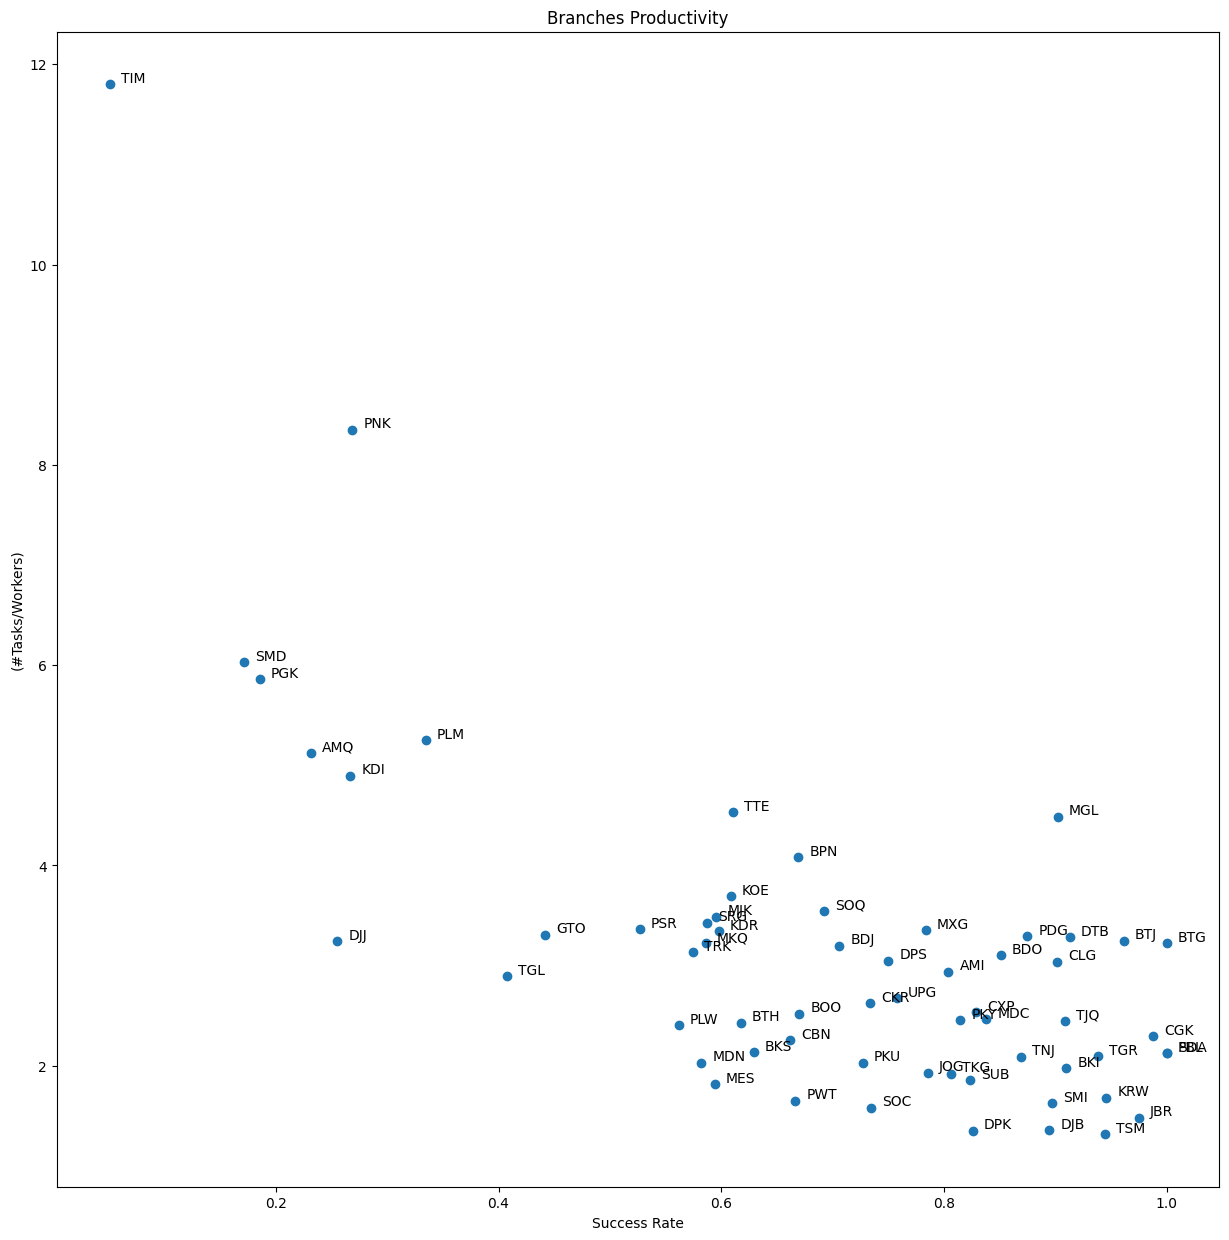

In [38]:
def plot_branch_productivity(df):
    df = df.copy()
    df['is_success'] = df['UserVar.taskStatusLabel'].apply(lambda x: 1 if x == 'Success' else 0)
    df = df.groupby('UserVar.branch_dest').agg({'is_success': 'sum', 'taskAssignedTo':'nunique', 'taskId': 'count'})
    df['success_rate'] = df['is_success']/df['taskId']
    df['worker_tasks'] = df['taskId']/df['taskAssignedTo']
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(df['success_rate'], df['worker_tasks'])
    for idx, row in df.iterrows():
        ax.text(row['success_rate']+0.01, row['worker_tasks']+0.02, str(idx), fontsize=10)
    ax.set_title('Branches Productivity')
    ax.set_xlabel('Success Rate')
    ax.set_ylabel('(#Tasks/Workers)')
    plt.show()
    return None
plot_branch_productivity(df)

We can see a clear correlation between number of tasks per worker and the success rate of a destination branch. This is certainly a valuable insight, we can do some manning optimization in rush hours (possibly with part-time workers) to keep our success rate above a predefined threshold

### 7. Investigate `taskLocationDone`

We are going to check whether we can get useful information from `taskLocationDone` compared to other data. However, we need to map the branches first.

In [39]:
!pip install selenium
!pip install webdriver_manager

You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/yusuf/mileapp_env/bin/python3 -m pip install --upgrade pip' command.


In [61]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time

In [87]:
names = []
regions = []
abbrevs = []
driver = webdriver.Chrome()
driver.get("https://id.wikipedia.org/wiki/Daftar_bandar_udara_tersibuk_di_Indonesia")
name_s = driver.find_elements(By.XPATH, '//*[@id="mw-content-text"]/div[1]/table/tbody/tr/td[2]')
region_s = driver.find_elements(By.XPATH, '//*[@id="mw-content-text"]/div[1]/table/tbody/tr/td[4]')
abbrev_s = driver.find_elements(By.XPATH, '//*[@id="mw-content-text"]/div[1]/table/tbody/tr/td[5]')
for name in name_s:
    names.append(name.text)
for region in region_s:
    regions.append(region.text)
for abbrev in abbrev_s:
    abbrevs.append(abbrev.text)
driver.quit()

df_airports = pd.DataFrame(data={'names': names, 'regions': regions, 'abbrevs': abbrevs})
df_airports.head()

,names,regions,abbrevs
0,Bandar Udara Internasional Soekarno–Hatta,Jakarta,CGK
1,Bandar Udara Internasional Ngurah Rai,Denpasar,DPS
2,Bandar Udara Internasional Juanda,Surabaya,SUB
3,Bandar Udara Internasional Sultan Hasanuddin,Makassar,UPG
4,Bandar Udara Internasional Kualanamu,Medan,KNO


In [89]:
print(len(df['UserVar.branch_origin'].unique()))
print(len(df_airports['abbrevs'].unique()))

60
52


In [ ]:
set(df['UserVar.branch_origin'].unique()) - 

There are still some original branches not listed from the internet.

In [50]:
df.merge(df_airports, how='left', left_on='UserVar.branch_origin', right_on='abbrevs'))

8334

### 16. Relationship between failed status, location, and `taskCompletedTime`

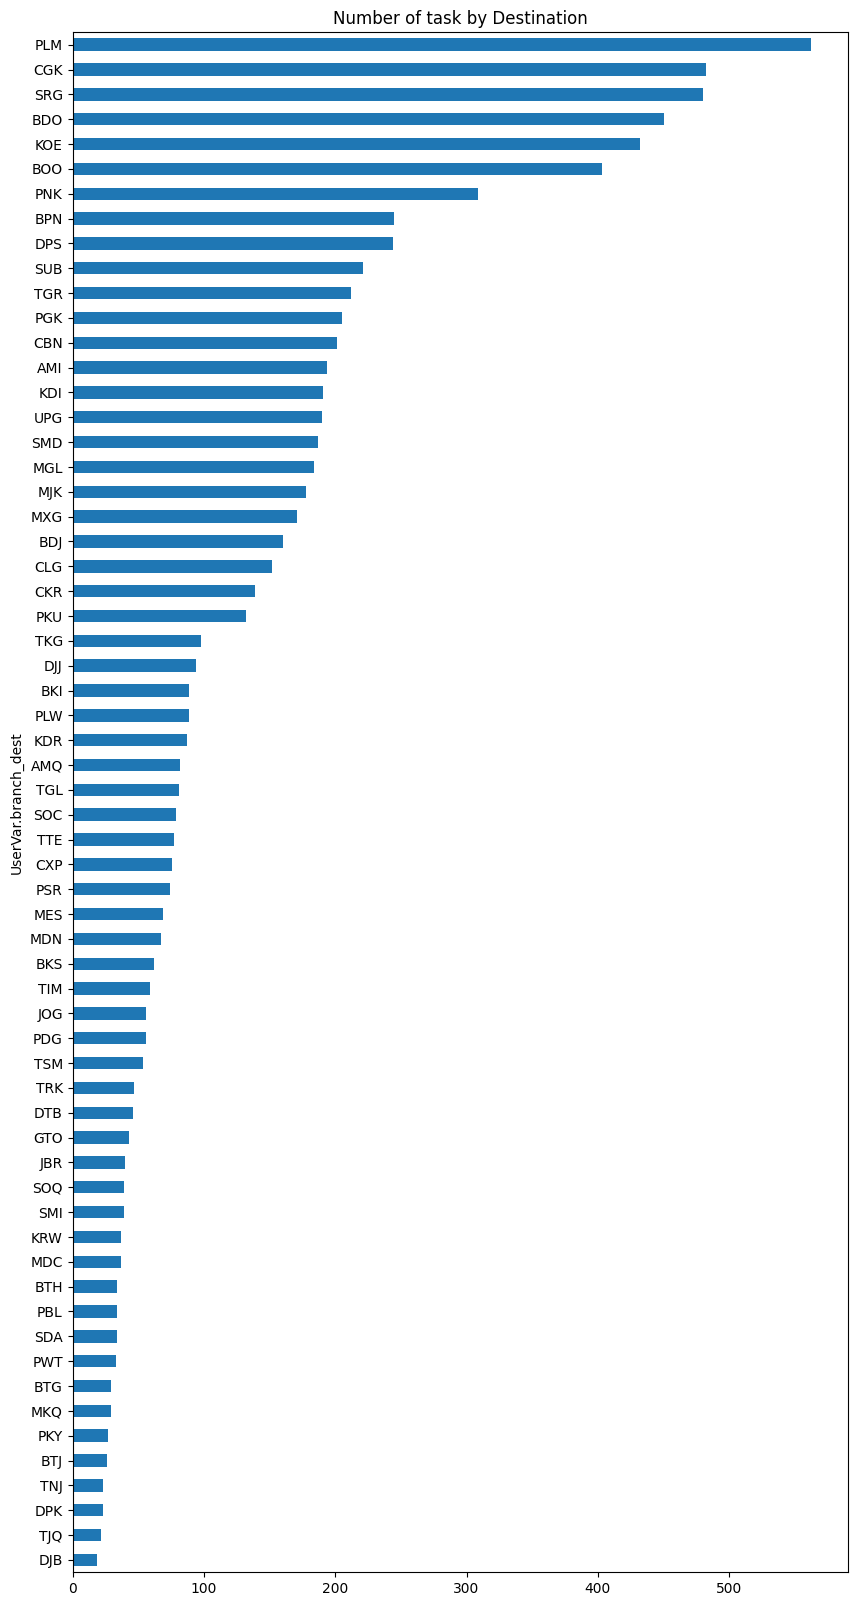

In [42]:
df['UserVar.branch_dest'].value_counts().sort_values().plot.barh(figsize=(10, 20))
plt.title('Number of task by Destination')
plt.show()

We can see that the destination branches are more dispersed than the origin branches. We are going to take a look at the normalized version

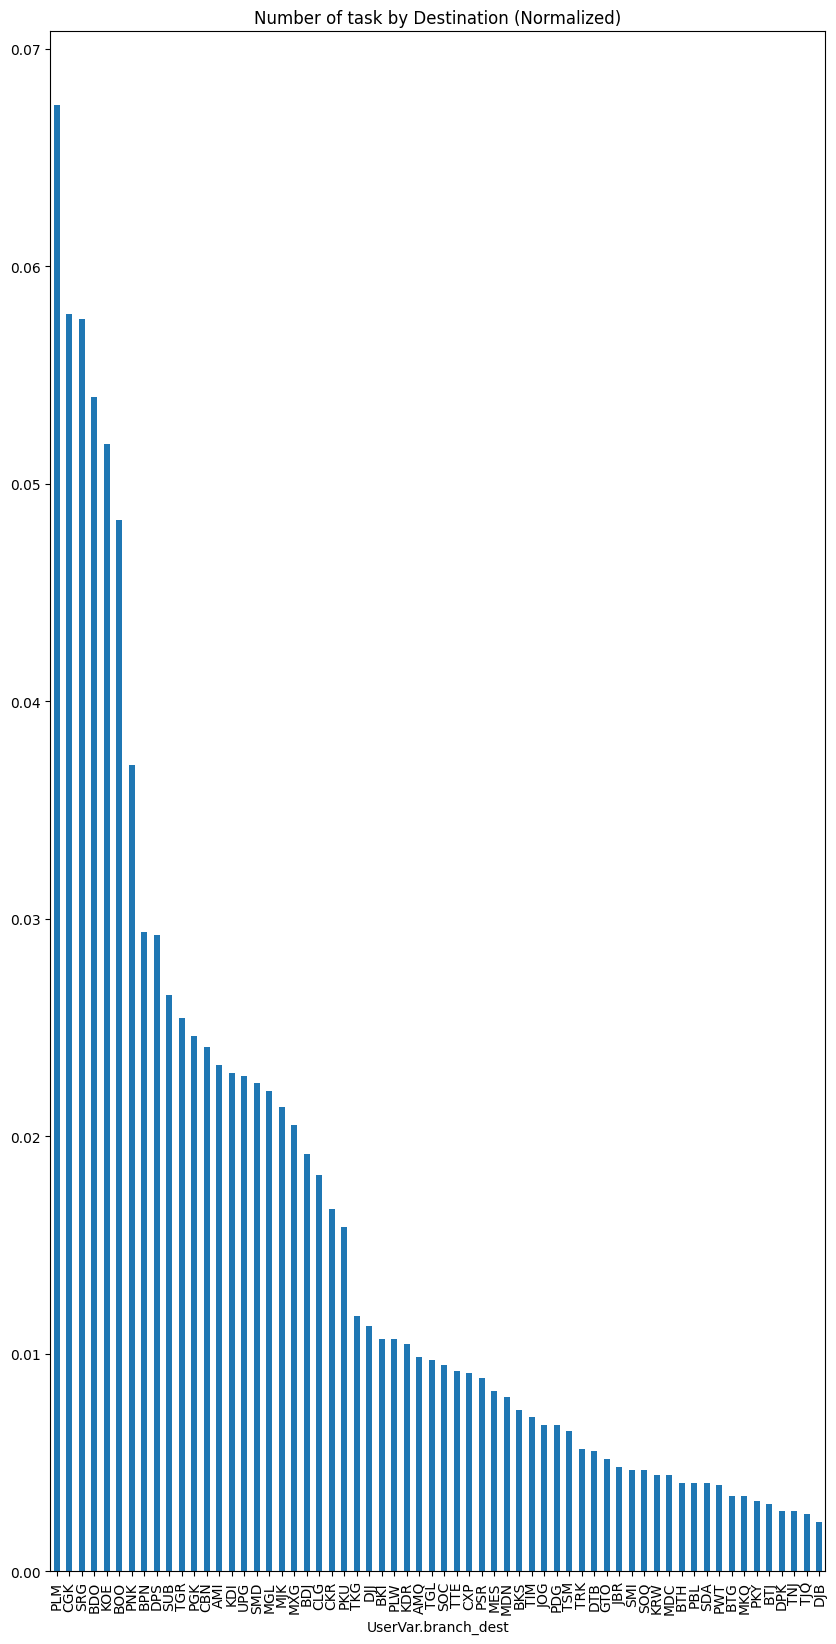

In [43]:
df['UserVar.branch_dest'].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(10, 20))
plt.title('Number of task by Destination (Normalized)')
plt.show()

Let's see whether there are certain rush hours in the destination branches

In [44]:
df['taskCompletedTime_timezone'] = df['taskCompletedTime'].str[-4:] # take the timezone
df['taskCompletedTime'] = df['taskCompletedTime'].str[:20] # exclude the timezone
df = extract_datetime_info(df, 'taskCompletedTime')

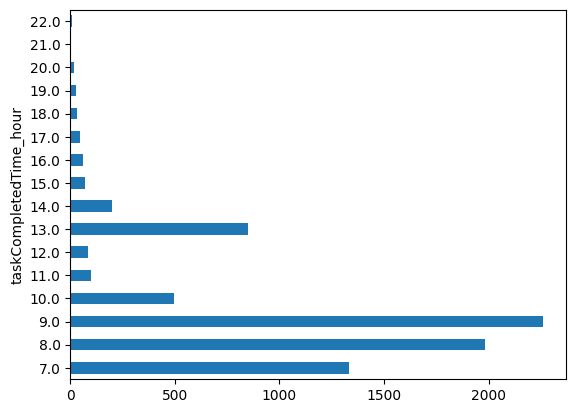

In [45]:
df['taskCompletedTime_hour'].value_counts().sort_index().plot.barh()
plt.show()

We can see that most of our orders are delivered in the morning and noon. This is understandable because couriers is working in those hours.

In [46]:
df['flow'].value_counts()

flow
Delivery    8334
Name: count, dtype: int64